# 5105 project
author: Yijin Sheng

## Introduction to Dataset

The dataset is from Kaggle [Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). It contains various features of the most streamed Spotify songs in 2023. The dataset contains 943 rows and 24 columns. The columns are as follows:

Basic Track Information:
- **track_name**: Name of the song  
- **artist(s)_name**: Name of the artist(s) of the song  
- **artist_count**: Number of artists contributing to the song  

Release Time:
- **released_year**: Year when the song was released  
- **released_month**: Month when the song was released  
- **released_day**: Day of the month when the song was released 

Platform Performance Metrics:
- **in_spotify_playlists**: Number of Spotify playlists the song is included in  
- **in_spotify_charts**: Presence and rank of the song on Spotify charts  
- **streams**: Total number of streams on Spotify  
- **in_apple_playlists**: Number of Apple Music playlists the song is included in  
- **in_apple_charts**: Presence and rank of the song on Apple Music charts  
- **in_deezer_playlists**: Number of Deezer playlists the song is included in  
- **in_deezer_charts**: Presence and rank of the song on Deezer charts  
- **in_shazam_charts**: Presence and rank of the song on Shazam charts  

Music Features:
- **bpm**: Beats per minute, a measure of song tempo  
- **key**: Key of the song  
- **mode**: Mode of the song (major or minor)  
- **danceability_%**: Percentage indicating how suitable the song is for dancing  
- **valence_%**: Positivity of the song's musical content  
- **energy_%**: Perceived energy level of the song  
- **acousticness_%**: Amount of acoustic sound in the song  
- **instrumentalness_%**: Amount of instrumental content in the song  
- **liveness_%**: Presence of live performance elements  
- **speechiness_%**: Amount of spoken words in the song  


### Load data

In [1]:
import chardet
with open('data/spotify-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())  
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


The dataset is in `ISO-8859-1` encoding. We then load the data using `pandas` library and preview the first few rows of the dataset.

In [2]:
# load the data
import pandas as pd
df = pd.read_csv('data/spotify-2023.csv', encoding='ISO-8859-1')
# show the first 5 rows
print(df.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
# overview the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

We can see there are some missing values in the dataset and some columns are in the wrong data type. (e.g. `stream` should be in integer type) So before visualization, we need to clean the data first.

## Data Cleaning before EDA

For better visualization, we will perform the following data preprocessing steps:

1. Check for Duplicates
   - if there are duplicates, we will remove them
2. Check for Missing Values
   - if there are missing values, we will fill them with appropriate values depending on the column. We are not going to drop the rows with missing values as it will result in loss of data and the dataset is not very large.
3. Check for Data Types
   - we want all integer columns to have consistent data types.

In [4]:
# check for duplicates
print(df.duplicated().sum())

0


We get `0` duplicates so we do nothing here.

In [5]:
# check for missing values
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


We get `50` missing values in `in_shazam_charts` column and `95` in `key` column. Let's fill missing values in `in_shazam_charts` column with mode and in `key` column with new category `unknown` since it takes about 10% of the data. 

In [6]:
# fill missing values in `in_shazam_charts` column with mode
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(df['in_shazam_charts'].mode()[0])
# fill missing values in `key` column with new category `unknown`
df['key'] = df['key'].fillna('Unknown')

# Verify if the missing values are filled
print(df.isnull().sum())


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


Here we have handled the missing values. Now we will check the data types of the columns and convert them to the appropriate data types.

In [7]:
# check for data types
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


The `stream`, `in_deezer_playlists`,`in_shazam_charts` columns are in `object` data type while they have numeric values. We will convert them to `int64` data type (to be consistent with the other integer columns).

In [8]:
# convert the 'streams', 'in_deezer_playlists', and 'in_shazam_charts' columns to integers
df['streams'] = df['streams'].replace({',': ''}, regex=True)  # Remove commas 
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0).astype('int64')

df['in_deezer_playlists'] = df['in_deezer_playlists'].replace({',': ''}, regex=True)  # Remove commas
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').fillna(0).astype('int64')

df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True)  # Remove commas
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce').fillna(0).astype('int64')

#Verify the changes
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


Here we have cleaned the data and now we can proceed with the exploratory data analysis (Visualization). Notice there will be another data preprocessing step focusing on feature engineering before building the model.

## Exploratory Data Analysis (Visualization)

We will use the step to visualize the data and understand the relationships between different features. It may help us to make decision to better prepare the data for model building. 

Since in our dataset, both `numerical` and `categorical` features are present, we will divide the visualization into two parts: numerical and categorical.

- For `numerical` features, we will use `histograms` and `boxplots` to visualize the distribution of the data. We also use `heatmap` to show the correlation between numerical features.

- For `categorical` features, we will use `pie charts` to visualize the distribution of the data.

We use `seaborn` and `matplotlib` libraries for visualization. Also, since we are analyzing the `spotify` dataset, we will use [spotify green](https://usbrandcolors.com/spotify-colors/) color for the plots using `color` parameter. And for those using `cmap` parameter, we will use `Greens` or `summer` color map.

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [10]:
# define the spotify green color
spotify_green = '#1DB954'

### Numerical Features

We start by using pandas `describe` method to get the summary statistics of the numerical features. Then we visualize the distribution of the numerical features using histograms and boxplots.

In [11]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(cmap='Greens', low=.5, high=0).format("{:.2f}")

,min,50%,mean,max,std
artist_count,1.00,1.00,1.56,8.00,0.89
released_year,1930.00,2022.00,2018.24,2023.00,11.12
released_month,1.00,6.00,6.03,12.00,3.57
released_day,1.00,13.00,13.93,31.00,9.20
in_spotify_playlists,31.00,2224.00,5200.12,52898.00,7897.61
in_spotify_charts,0.00,3.00,12.01,147.00,19.58
streams,0.00,290228626.00,513597931.31,3703895074.00,566803887.06
in_apple_playlists,0.00,34.00,67.81,672.00,86.44
in_apple_charts,0.00,38.00,51.91,275.00,50.63
in_deezer_playlists,0.00,44.00,385.19,12367.00,1130.54


#### Histograms

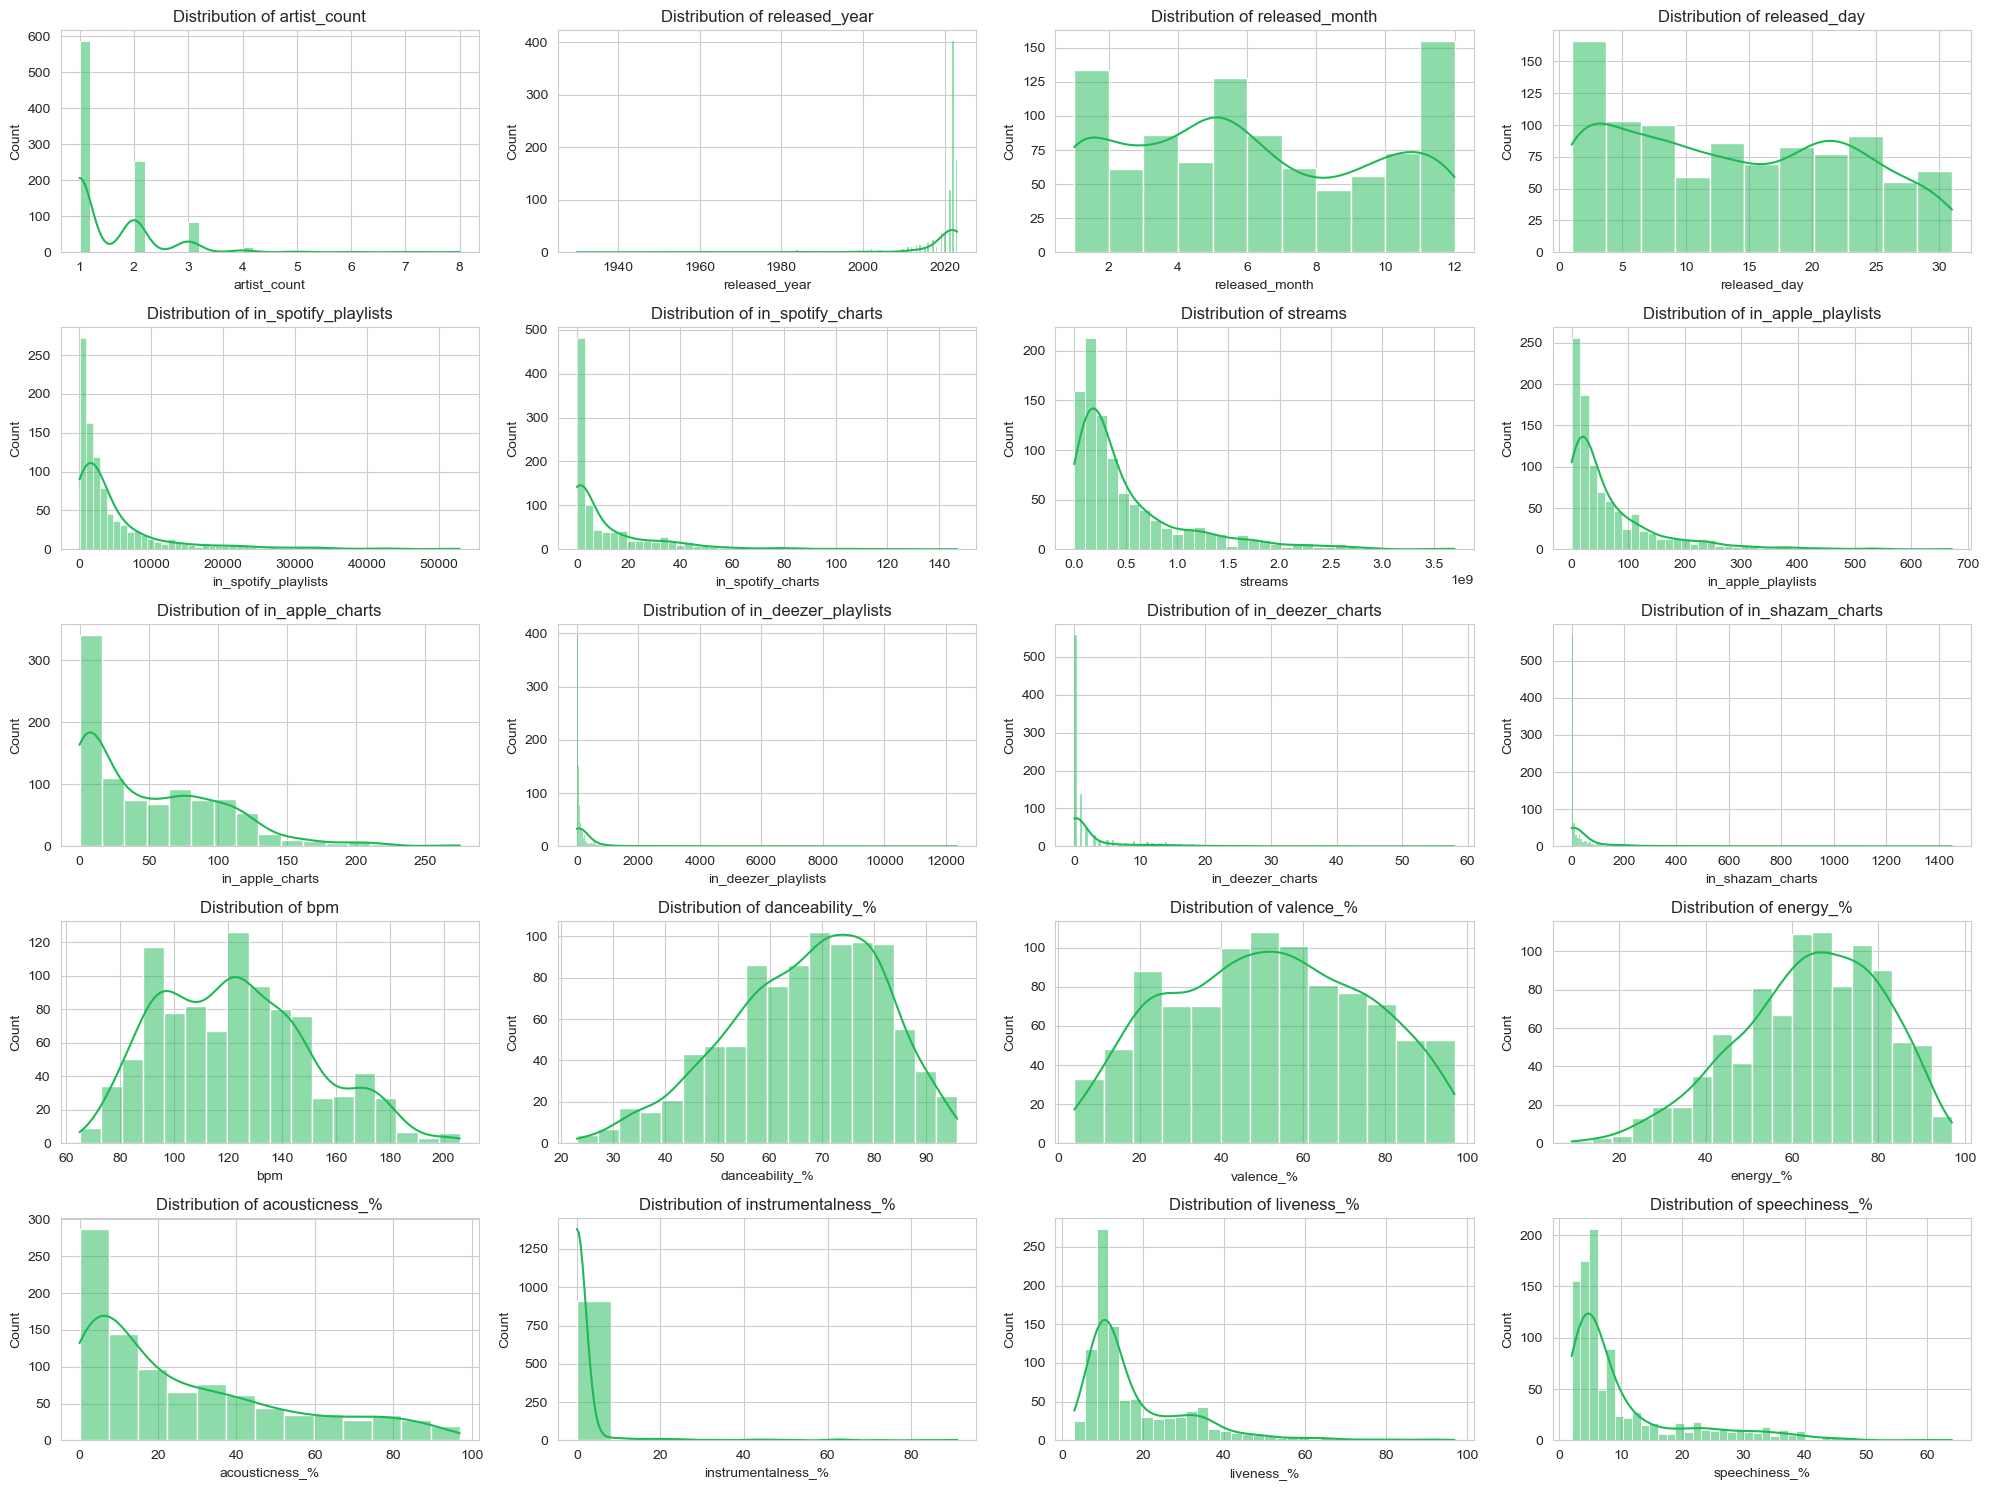

In [12]:
# Plot distribution for all numerical features
numeric_features = df.select_dtypes(include=['int64']) # Select only numerical features

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, color=spotify_green)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


#### Boxplots


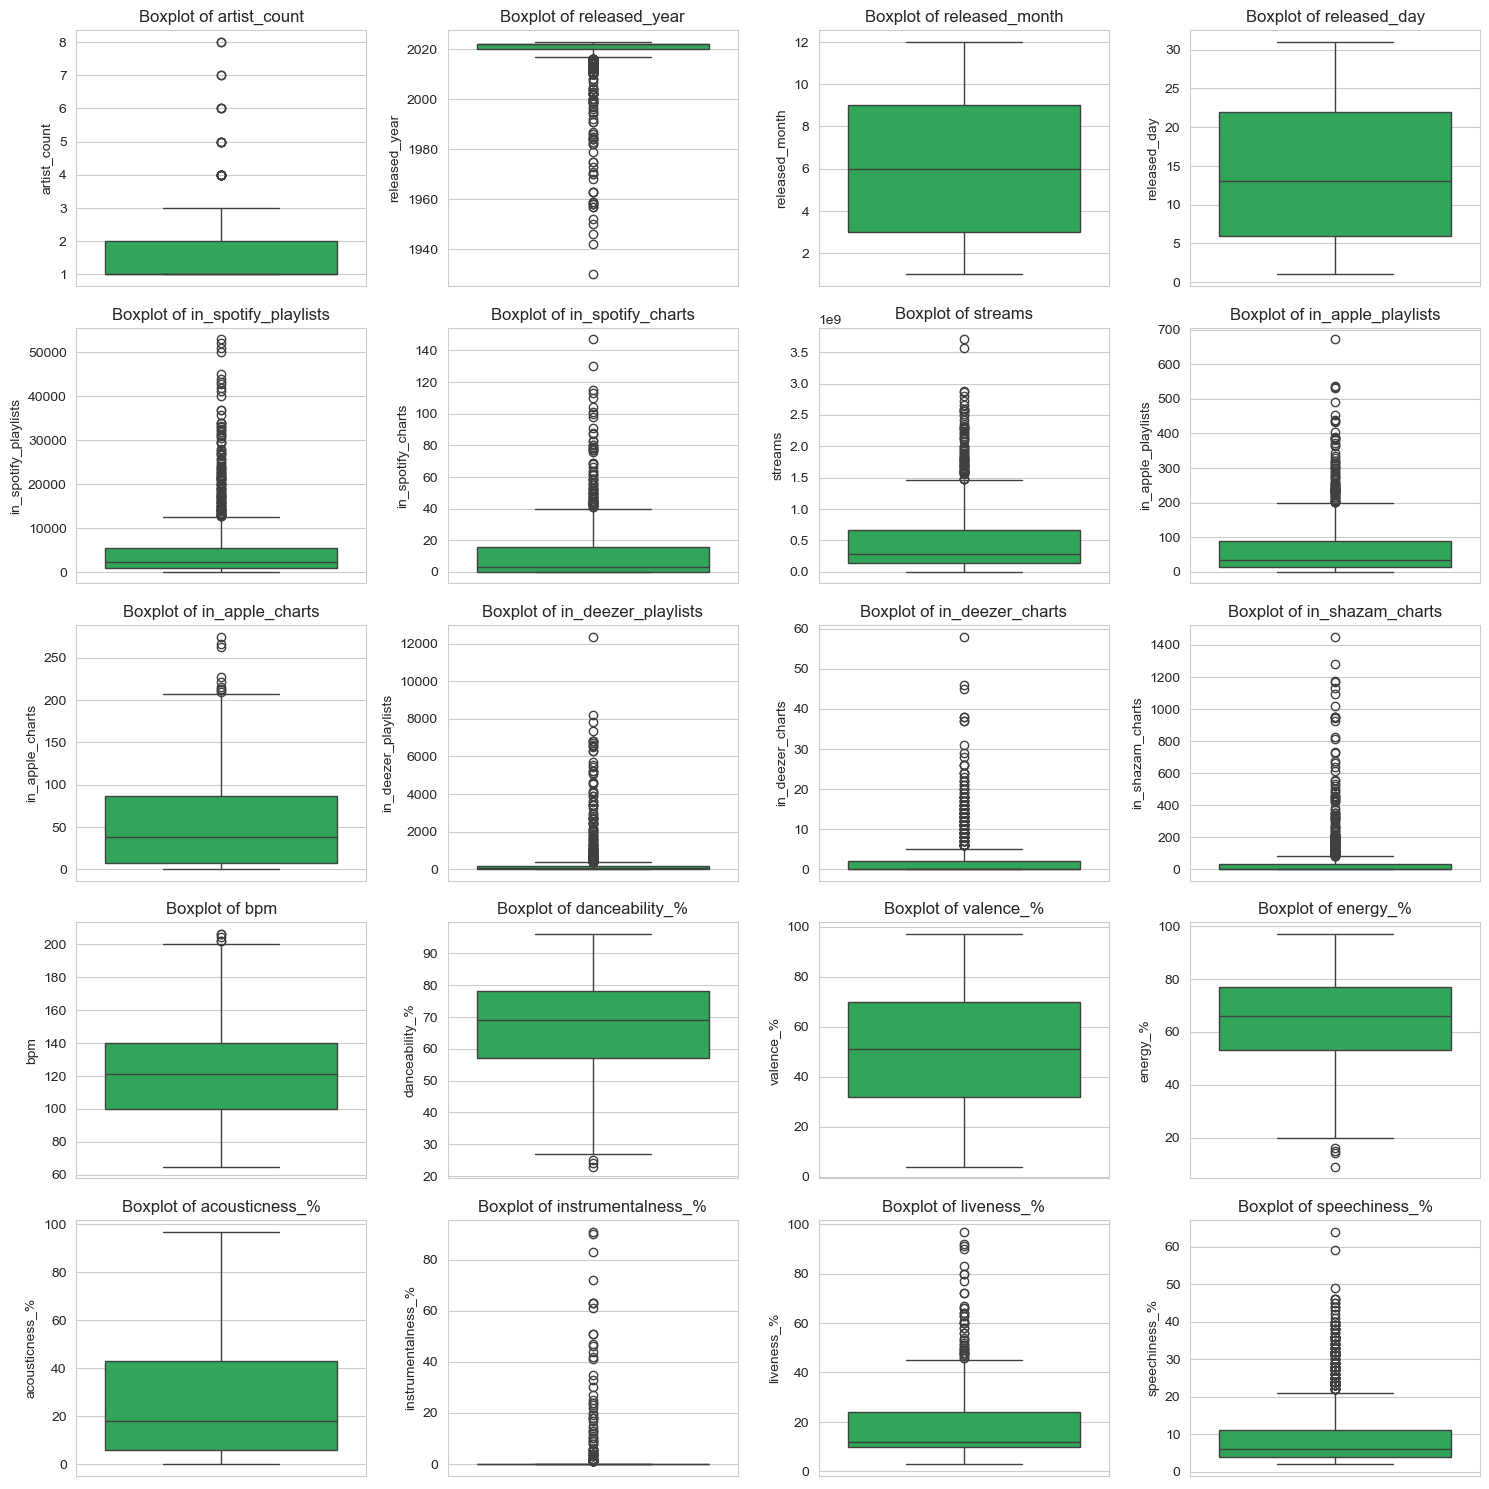

In [13]:
# boxplot for all numerical features
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col], color=spotify_green)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#### Findings from Histograms and Boxplots

1. **Artist Count**: Most tracks are associated with a single artist, with fewer tracks having multiple contributing artists. This skew suggests that solo performances are more common in the 2023 Spotify dataset.
2. **Released Year**: This is clearly a right-skewed distribution, with a peak around 2020 and a long tail of older tracks. It reflects the fact that most of the popular tracks in the dataset are recent releases.
3. **Released Month and Day**: 
   - The distribution across months is fairly uniform, though there are minor peaks around January, December and May.
   - The distribution across days appears almost uniform, except for a peak around the beginning of the month.
   - We may consider ignoring these features in the model, as they do not seem to have a strong effect on track popularity or clustering.
4. **Streams**: The plot is highly right-skewed, with only a few tracks achieving extremely high stream counts. This is consistent with the power-law distribution of popularity in the music industry. It may help to use log-transformations to normalize this feature.
5. **Platform Performance Metrics**: Most tracks have low or no presence in these playlists and charts, with a few popular tracks appearing frequently. This skewed distribution also reflects the power-law distribution of popularity in the music industry. We may consider using log-transformations or binning these features for better model performance.
6. **Musical Features**:  
   - **BPM**: Most songs have BPM values between 100 and 140, with a mean around 120. There are some outliers with extremely BPM higher than 200, we may consider binning this feature to reduce the effect of outliers.
   - **Danceability, Valence, and Energy**: These distributions are roughly normal, centered around mid to high values, indicating that tracks tend to have moderate to high levels of danceability, positivity, and energy.  
   - **Acousticness, Instrumentalness, Liveness, and Speechiness**: These features are highly skewed towards lower values, indicating that most tracks are not acoustic, have low instrumental quality, are studio-produced, and are not speech-heavy. It may help to use log-transformations or map these features to categorical bins for better model performance.



#### Heatmap

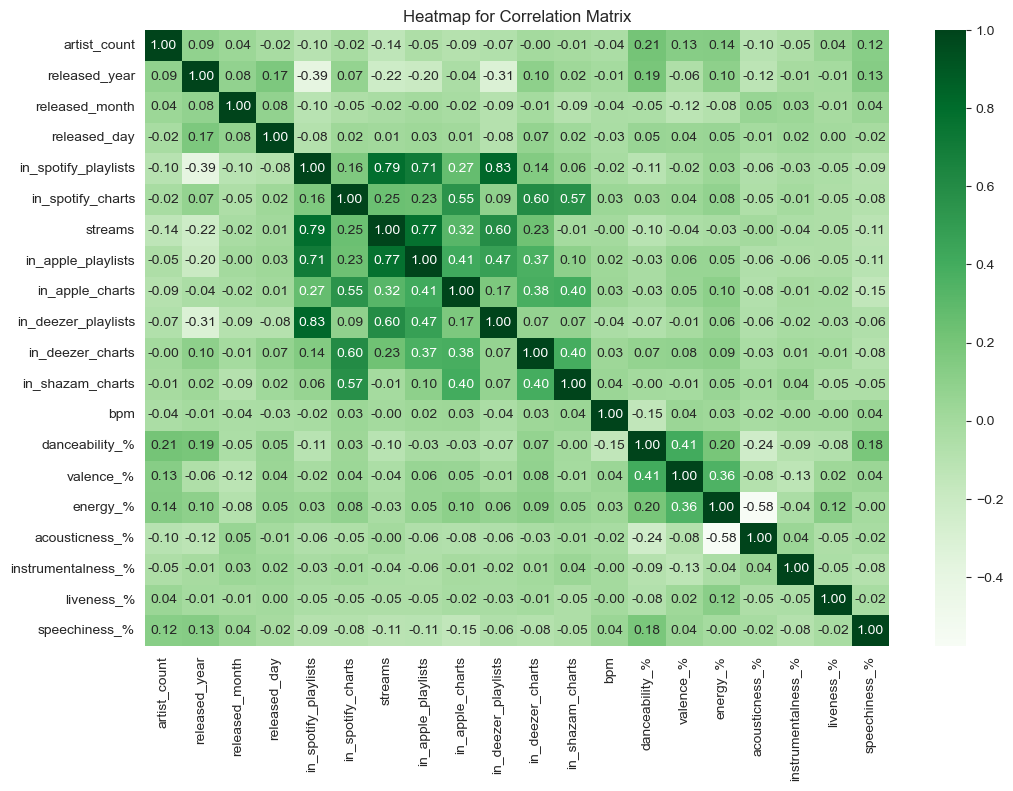

In [14]:
# heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Heatmap for Correlation Matrix')
plt.show()

#### Findings from Heatmap

1. **High Correlations Between Platform Performance Metrics:**  
   *in_spotify_playlists*, *in_spotify_charts*, *streams*, and other platform-specific chart metrics show significant positive correlations (0.6 and above). This suggests that tracks featured in playlists or charts on one platform are likely to perform well across other platforms, highlighting a cross-platform popularity trend. It may help to combine thse features into a single composite metric for model building.

2. **Release Year and Popularity:**  
   *released_year* has weak to moderate negative correlations with playlist/chart features such as *in_spotify_playlists* (-0.39) and *in_apple_playlists* (-0.31). This suggests that older tracks are less likely to appear in playlists and charts, reflecting a focus on newer releases in music recommendations. It may help to convert *released_year* into a numeric feature (e.g. song_age) to make this relationship more explicit.

3. **Musical Features Correlations:**  
   *danceability_%*, *valence_%*, and *energy_%* are positively correlated with each other. For example, *danceability_%* and *energy_%* have a correlation of 0.41. This suggests that tracks with high danceability often have higher energy, which aligns with common music characteristics for danceable songs.  It may help to combine these features into a single composite metric for model building.
   *acousticness_%* has moderate negative correlations with *energy_%* (-0.58) and *valence_%* (-0.36), indicating that more acoustic tracks tend to have lower energy and a less positive (or neutral) mood. 

4. **Low Correlations with *speechiness_%* and *liveness_%*:**  
   This indicates that these characteristics are relatively independent of other track attributes, including popularity and musical features. We should not combine them with each other in feature engineering.


### Categorical Features

#### Pie Charts for Key, Mode

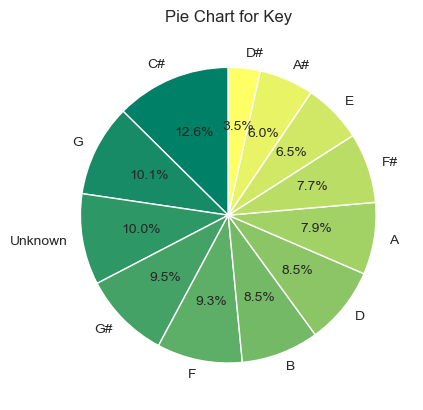

In [15]:
# pie chart for `key` column
df['key'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='summer')
plt.title('Pie Chart for Key')
plt.ylabel('')
plt.show()

There are in total 12 keys in the dataset. The most common key is `C#` and the least common key is `D#`. The gap between the most common key and the least common key is not very large. And the attribute `key` is ordinal. Maybe we can encode it with ordinal encoding.

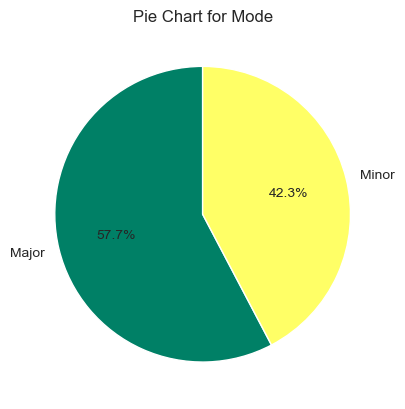

In [16]:
# pie chart for `mode` column
df['mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='summer')
plt.title('Pie Chart for Mode')
plt.ylabel('')
plt.show()

57.7% of the songs are in major mode and 42.3% are in minor mode. The mode attribute is nearly evenly distributed. Plus, it is binary, so we can encode it as 0 and 1 in the feature engineering step.

#### Bar plot for artist name, track name

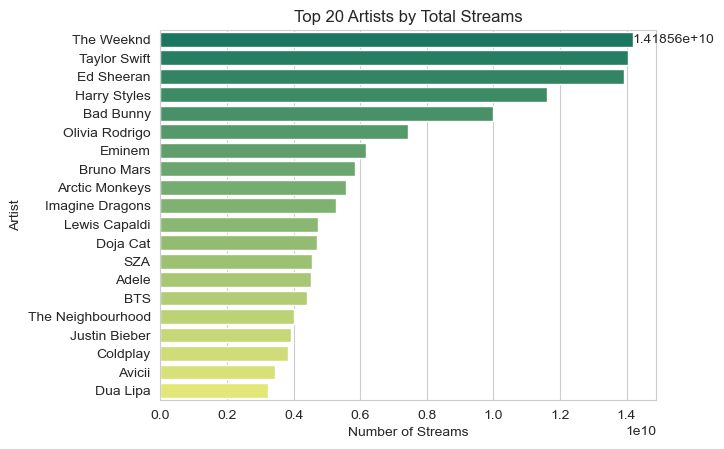

In [17]:
# Top 20 artists with the highest streams
top_20_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(20)

ax = sns.barplot(x=top_20_artists.values, y=top_20_artists.index, palette='summer', hue=top_20_artists.index)
ax.bar_label(ax.containers[0])
plt.xlabel("Number of Streams")
plt.ylabel("Artist")
plt.title("Top 20 Artists by Total Streams")
plt.show()

We are interested in the music features of the top artists' tracks. We will visualize the mean of the numeric music features and mode of catorical features for the top 10 artists' tracks in the dataset. An overall mean and mode will be calculated for each feature in order to generalize the common music features of the top artists' tracks.

In [18]:
df.columns # for easier reference

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [19]:
# List of numeric and categorical columns
numeric_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
categorical_features = ['key', 'mode']

# if there are multiple modes, return the first one
def mode_or_first(series):
    modes = series.mode()
    if not modes.empty:
        return modes[0]
    return None

# Filter songs for the top 20 artists
top_20_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(10)
top_artists_songs = df[df['artist(s)_name'].isin(top_20_artists.index)]

# Aggregate: mean for numeric features, mode for categorical features
aggregations = {col: 'mean' for col in numeric_features}
aggregations.update({col: mode_or_first for col in categorical_features})

# Group by artist(s) and aggregate
artist_features = top_artists_songs.groupby('artist(s)_name').agg(aggregations)
artist_features[numeric_features] = artist_features[numeric_features]

# Calculate Overall Mean and Mode
overall_mean = top_artists_songs[numeric_features].mean()
overall_mode = top_artists_songs[categorical_features].agg(mode_or_first)

# Combine into a DataFrame
overall_stats = pd.concat([overall_mean, overall_mode])
overall_stats_df = overall_stats.to_frame().T
overall_stats_df.index = ['Overall']

# Append to artist_features DataFrame
artist_features_with_overall = pd.concat([artist_features, overall_stats_df], axis=0)

# Apply Styling
artist_features_with_overall.style.background_gradient(subset=numeric_features, cmap='Greens', low=0.5, high=0) .format({col: "{:.2f}" for col in numeric_features})



,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key,mode
Arctic Monkeys,113.00,56.25,46.75,60.75,8.25,0.50,12.00,3.75,Unknown,Major
Bad Bunny,119.16,75.16,53.21,66.74,22.84,3.32,18.16,9.84,C#,Major
Bruno Mars,136.00,62.00,45.75,60.75,38.00,0.00,15.50,4.25,F,Major
Ed Sheeran,116.78,69.67,51.33,64.78,28.89,0.00,16.33,5.00,D,Major
Eminem,117.75,79.75,43.75,68.00,6.25,0.00,22.25,17.25,D,Major
Harry Styles,128.53,61.35,54.00,58.88,42.82,1.59,14.29,5.35,Unknown,Major
Imagine Dragons,139.67,62.33,59.00,73.67,8.67,0.00,19.33,7.00,A#,Minor
Olivia Rodrigo,162.14,51.29,38.43,50.57,53.29,0.00,20.43,10.00,A,Major
Taylor Swift,125.53,59.76,35.56,56.79,27.88,0.68,15.41,7.38,G,Major
The Weeknd,119.73,57.68,42.27,63.91,20.59,1.41,19.68,7.86,Unknown,Minor


In [20]:
print(overall_stats_df)

                bpm danceability_%  valence_%   energy_% acousticness_%  \
Overall  125.390244      62.902439  44.886179  61.154472      27.902439   

        instrumentalness_% liveness_% speechiness_%      key   mode  
Overall           1.186992   17.00813      7.634146  Unknown  Major  


The overall bpm is around 125, which considered as fast and bright according to the [tempo classification](https://en.wikipedia.org/wiki/Tempo). With inspecting the other music features, we can generalize that the tracks of the top artists are moderately energetic, danceable tracks with neutral emotional tones, modern electronic instrumentation, and mostly major modes.

Another view is to see the top tracks. Again, the overall mean and mode will be calculated for each feature in order to generalize the common music features of the top tracks.

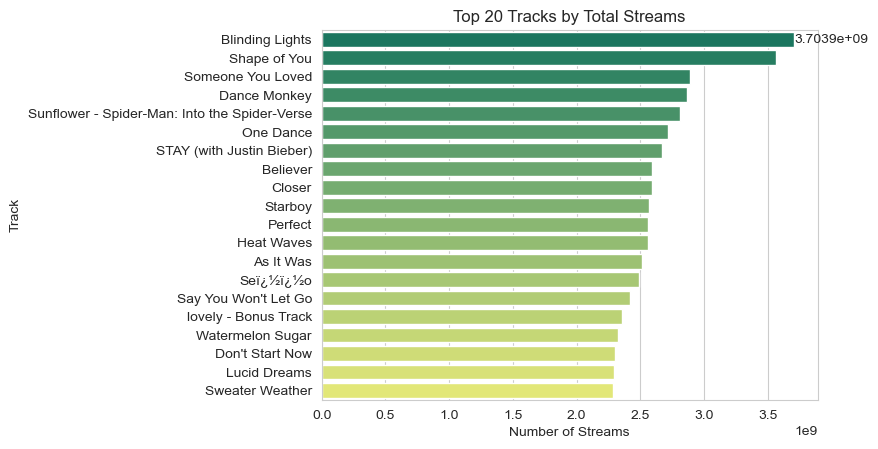

In [21]:
# Top 20 tracks with the highest streams
top_20_tracks = df.groupby('track_name')['streams'].sum().nlargest(20)

ax = sns.barplot(x=top_20_tracks.values, y=top_20_tracks.index, palette='summer', hue=top_20_tracks.index)
ax.bar_label(ax.containers[0])
plt.xlabel("Number of Streams")
plt.ylabel("Track")
plt.title("Top 20 Tracks by Total Streams")
plt.show()


In [22]:
top_20_tracks = df[df['track_name'].isin(top_20_tracks.index)]
# Calculate Mean and Mode
top_tracks_mean = top_20_tracks[numeric_features].mean().round(2)
top_tracks_mode = top_20_tracks[categorical_features].agg(mode_or_first)

# Combine Statistics
top_tracks_stats = pd.concat([top_tracks_mean, top_tracks_mode])
top_tracks_stats_df = top_tracks_stats.to_frame().T
top_tracks_stats_df.index = ['Top 20 Tracks']

# Apply Styling
top_tracks_stats_df.style.background_gradient(subset=numeric_features).format({col: "{:.2f}" for col in numeric_features})

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key,mode
Top 20 Tracks,117.65,63.75,52.45,61.10,31.90,0.10,15.60,7.65,C#,Major


The result is quite similar to the top artists' tracks except the mode of the key changes to `C#`, which is the most common key in the dataset. The key create a bright, uplifting, and slightly sharp or edgy sound.

## Outline of Analysis

  - Data Preprocessing and Feature Engineering for both Supervised Learning and Unsupervised Learning
    - Drop Unnecessary Columns `artist(s)_name`, `track_name`, `artist_count`,  `released_month`, `released_day`

    - Transform `released_year` into `song_age` by subtracting from the current year of the dataset (2023)
  - Supervised Learning (Regression)
    - Goal: Predict `streams` based on other features.
    - Data Prepocessing:  
      - Split the data into features (X) and target (y). 
      - Scale the features except target using StandardScaler.
      - Encode Categorical Features `key`, `mode` by ordinal encoding 
      - log-transform highly-skewed columns `streams`, `in_spotify_playlists`, `in_spotify_charts`, `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`, `in_shazam_charts`
    - Methods:  
      - Linear Regression  
      - Kernel Ridge Regression  
      - Random Forest  
      - Support Vector Regression (SVR)  
      - Neural Network  
    - Performance Metrics:  
      - Mean Absolute Error (MAE)
        - What it is: The average of absolute differences between predicted and actual values.
        - Why use it: Easy to interpret; less sensitive to outliers than RMSE.
      - Root Mean Squared Error (RMSE)  
        - What it is: The square root of the average of squared differences between predicted and actual values.
        - Why use it: Punishes large errors more than MAE; more sensitive to outliers.
      - R² (Coefficient of Determination)
        - What it is: Measures the proportion of variance in the dependent variable that is predictable from the independent variables.
        - Why use it: Useful for comparing different regression models.
        - Range: 0 (no fit) to 1 (perfect fit). 
          - \>0.7: Good for many practical cases. 
          - \>0.9: Excellent for most regression tasks. 
          - <0.5: Indicates the model may not be capturing the relationship effectively.
      - We will use RMSE as the primary metric for model evaluation and consider R^2 > 0.5 as a minimum threshold for model performance.
    - Cross-Validation and Hyperparameter Tuning:
      - Use **5-fold Cross-Validation** to evaluate model performance. The dataset will not be split into training and testing sets to ensure all data is used for training and validation. 
      - Perform **hyperparameter tuning** (Grid search) within the cross-validation framework for models having hyperparameters.
    - Comparison and Model Selection:
      - Hold out 20% of the data as a test set to evaluate the final model performance.
      - Compare the performance of different models based on MAE, RMSE, and R².
      - Select the best model based on the evaluation metrics and interpret the results.
    - Analysis: analyze why the best model performs well and dataset factors that may have influenced the results.

  - Unsupervised Learning (Clustering)
    - Goal: Cluster the songs based on their `song_age`, `streams` and `music features` (`bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'). 
    - Data Prepocessing:  
      - Drop Platform Performance Metrics column
      - Encode Categorical Features `key`, `mode` by ordinal encoding using mapping
      - Binning the bpm and encode it with ordinal encoding with mapping
    - Dimensionality Reduction:  
      - Principal Component Analysis (PCA): Reduce dimensionality while retaining at least 93% of the variance.
    - Clustering Methods: Clustering based on the features after PCA.
      - K-Means  
      - Hierarchical Clustering  
      - Gaussian Mixtures Model (GMM)
    - Performance Metrics:  
      - Silhouette Score
        - What it is: Measures how similar a data point is to its assigned cluster compared to other clusters.
        - Why use it: Indicates well-separated and compact clusters.
        - Range: -1 (poor clustering) to 1 (perfect clustering).
      - Davies-Bouldin Index 
        - What it is: Measures the ratio of within-cluster scatter to between-cluster separation.
        - Why use it: A lower score indicates better clustering.
        - Range: Lower is better; no fixed range.
      - We will use Silhouette Score as the primary metric for model evaluation.
    - Hyperparameter Tuning:
      - Use Elbow Method and Silhouette Score to determine the optimal number of clusters for K-Means.
      - Hyperparameter tuning for Hierarchical Clustering and GMM.
    - Comparison and Model Selection:
      - Compare the performance of different clustering methods based on Silhouette Score and Davies-Bouldin Index.
      - Interpret the clusters and identify common characteristics of songs within each cluster.


## Data Preprocessing and Feature Engineering

Following the outline of analysis, we will perform following steps for data preprocessing and feature engineering:
- Drop Unnecessary Columns `artist(s)_name`, `track_name`, `artist_count`,  `released_month`, `released_day`
- Transform `released_year` into `song_age` by subtracting from the current year of the dataset (2023)

Create a copy of the original dataset `df_copy` to keep the original data intact. Also, provide flexibility to revert back to the original data if needed and separate the dataframe used for regression and clustering. THe preprocessing required by
both tasks will be performed on `df_copy` and the dataframe for regression `df_reg` and clustering `df_clust` are copies of `df_copy` and will be modified according to their need.

In [23]:
# Make copy of the DataFrame
df_copy = df.copy()

In [24]:
df_copy.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [25]:
# Drop unnecessary columns
columns_to_drop = ['artist(s)_name', 'track_name', 'artist_count', 'released_month', 'released_day']
df_copy.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
df_copy.columns

Index(['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [26]:
# Create 'song_age' column 
current_year = 2023
df_copy['song_age'] = current_year - df_copy['released_year']

# remove 'released_year' column
df_copy.drop(columns=['released_year'], inplace=True)

# Verify the changes
df_copy.columns

Index(['in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'song_age'],
      dtype='object')

In [27]:
# Preparing df_reg, df_clust
df_reg = df_copy.copy()
df_clust = df_copy.copy()

## Regression 

Models are saved in the `models` folder for future comparsion. The hyperparameter tuning with 5-fold cv code is comment out and the process is recorded in the markdowm cells. We want compare 

### Data Preporcessing for Regression

Following the outline, we perform the following data preprocessing steps for regression:
- Scale the features using StandardScaler.
- Encode Categorical Features `key`, `mode` by ordinal encoding 
- log-transform highly-skewed columns `streams`, `in_spotify_playlists`, `in_spotify_charts`, `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`, `in_shazam_charts`
- Split the data into features (X) and target (y).

We want to include all the features in the model to include more information. So the regression model will take all the columns except `log_streams` as features and `log_streams` as the target variable.

Since SVR and Neural Network are sensitive to the scale of the features, we will standardize all the numerical features with StandardScaler. 

In [28]:
# Log-transform skewed columns and rename them
# Since log_stream works bad in PCA, I move it inside the dataprepocessing of regression
# In regression, I will use log_stream, it helps reduce the scale of the MSE
import numpy as np
log_transform_columns = [
    'streams', 'in_spotify_playlists', 'in_spotify_charts', 
    'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 
    'in_shazam_charts'
]

# Apply logarithmic transformation and rename columns
for column in log_transform_columns:
    df_reg[column] = np.log1p(df_reg[column])  # log1p to handle log(0) cases
    df_reg.rename(columns={column: f"log_{column}"}, inplace=True)  # Add "log_" prefix


In [29]:
# Encode categorical features ('key', 'mode')
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df_reg['key'] = ordinal_encoder.fit_transform(df[['key']])
df_reg['mode'] = ordinal_encoder.fit_transform(df[['mode']])

# Verify the changes
# print all unique values in the 'key' and 'mode' columns
print(df_reg['key'].unique())
print(df_reg['mode'].unique())


[ 2.  3.  7.  0.  4.  8. 11. 10.  9.  6.  1.  5.]
[0. 1.]


In [30]:
# Standardize numerical features using `StandardScaler` except for `log_streams`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize all the features except for `log_streams`
columns_to_standardize = df_reg.columns.difference(['log_streams'])
df_reg[columns_to_standardize] = scaler.fit_transform(df_reg[columns_to_standardize])

# Verify the changes
print(df_reg.head())

   log_in_spotify_playlists  log_in_spotify_charts  log_streams  \
0                 -1.054064               2.323854    18.766974   
1                 -0.317171               1.587129    18.711231   
2                 -0.357517               2.149893    18.757181   
3                  0.941776               2.069196    20.501173   
4                  0.249958               1.613792    19.530023   

   log_in_apple_playlists  log_in_apple_charts  log_in_deezer_playlists  \
0                0.214063             1.510201                -0.089348   
1                0.294868             1.054323                 0.040929   
2                0.791912             1.361674                 0.273458   
3                0.948292             1.361674                 0.438070   
4                0.708408             1.087748                 0.250191   

   log_in_deezer_charts  log_in_shazam_charts       bpm       key      mode  \
0              1.807910              2.354145  0.087708 -1.058587 -

The current `df_reg` is now good for regression. We will split the data into features (X) and target (y) and then further split it into training and testing sets. Since we are using 5-fold cross-validation, we will not create a separate test set. When we finally evaluate the model, we will hold out 20% of the data randomly as a test set.

In [31]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import joblib # for saving models

In [32]:
# Split data into features (X) and target (y)
X = df_reg.drop(columns=['log_streams'])  # Features
y = df_reg['log_streams']  # Target
# X = df_reg.drop(columns=['streams'])  # Features
# y = df_reg['streams']  # Target

In [33]:
#print max or min of the target variable
print(y.max())
print(y.min())
print(y.mean())

22.032650825845312
0.0
19.486179792980387


Now we will build the regression models and evaluate their performance using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² (Coefficient of Determination). We will start with Linear Regression and then proceed with Kernel Ridge Regression, Random Forest, Support Vector Regression (SVR), and Neural Network.

In [34]:
# Define the scoring metrics for cross-validation
scor_metrics = {
    "MSE": make_scorer(mean_squared_error, greater_is_better=False),
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "R2": make_scorer(r2_score)
}

In [35]:
# Define function to aggregate cross-validation results
def aggregate_cv_results(cv_results):
    return {
        "Mean MSE": -np.mean(cv_results["test_MSE"]),
        "Std MSE": np.std(cv_results["test_MSE"]),
        "Mean MAE": -np.mean(cv_results["test_MAE"]),
        "Std MAE": np.std(cv_results["test_MAE"]),
        "Mean R²": np.mean(cv_results["test_R2"]),
        "Std R²": np.std(cv_results["test_R2"]),
    }

### Linear Regression

We start with the simplest model, Linear Regression, to establish a baseline performance.
No need for hyperparameter tuning in Linear Regression. We will perform 5-fold cross-validation and evaluate the model performance using MAE, RMSE, and R².

In [36]:
# Define the model
linear_regression = LinearRegression()

# Perform 5-fold cross-validation
cv_results_lr = cross_validate(
    linear_regression, X, y, scoring=scor_metrics, cv=5, return_train_score=False
)

# Aggregate results
results_lr = aggregate_cv_results(cv_results_lr)

# Display results
print("5-Fold Cross-Validation Results for Linear Regression:")
print(pd.DataFrame([results_lr]))



5-Fold Cross-Validation Results for Linear Regression:
   Mean MSE   Std MSE  Mean MAE   Std MAE   Mean R²    Std R²
0  1.031296  0.707255  0.543499  0.094385  0.357306  0.237588


In [37]:
# print the coefficients
linear_regression.fit(X, y)
print("Linear Regression Coefficients:")
print(linear_regression.coef_)
print(linear_regression.intercept_)

Linear Regression Coefficients:
[ 0.79445397  0.19957581  0.0238122   0.13627263  0.16250265 -0.12142865
 -0.16079415  0.01791594  0.05484507  0.02748857  0.05610619 -0.02424841
 -0.01801176  0.07172378 -0.0215349  -0.00461842 -0.05320072 -0.16083712]
19.486179792980387


### Kernel Ridge Regression
KRR requires hyperparameter tuning, we will use GridSearchCV to find the optimal hyperparameters. We will perform 5-fold cross-validation and evaluate the model performance using MAE, RMSE, and R². Each trial will be recorded markdown cell below the code cell.


In [38]:
# # Kernel Ridge Regression - Hyperparameter Tuning
# param_grid_kr = {
#     'alpha': [0.3, 0.5, 0.7],
#     'kernel': ['poly'],
#     'gamma': [0.0005, 0.001, 0.002],  # Further refine gamma
#     'degree': [3, 4]  # Narrow range to degree 3 and 4
# }


# grid_kr = GridSearchCV(
#     KernelRidge(),
#     param_grid_kr,
#     scoring=scor_metrics,  
#     refit='MSE',  # Fit the best model with the best MSE
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1  # Utilize all CPU cores
# )
# # Fit the model
# grid_kr.fit(X, y)

# # Extract the best model and parameters
# best_kr_model = grid_kr.best_estimator_
# print("Kernel Ridge Best Parameters:", grid_kr.best_params_)

# # Extract cross-validation results for the best model
# best_index = grid_kr.best_index_
# mean_mse = -grid_kr.cv_results_['mean_test_MSE'][best_index]  # Convert negative MSE to positive
# mean_mae = -grid_kr.cv_results_['mean_test_MAE'][best_index]  # Convert negative MAE to positive
# mean_r2 = grid_kr.cv_results_['mean_test_R2'][best_index]

# # Print results
# print(f"Kernel Ridge Best Score (MSE): {mean_mse:.4f}")
# print(f"Kernel Ridge Best Mean MAE: {mean_mae:.4f}")
# print(f"Kernel Ridge Best Mean R²: {mean_r2:.4f}")


#### Tuning process for Kernel Ridge Regression
First try: 

```python
param_grid_kr = {
    'alpha': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3, 4]  # Only applies to 'poly' kernel
}
```
Result: 
```
Kernel Ridge Best Parameters: {'alpha': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}
Kernel Ridge Best Score (MSE): 0.9600
Kernel Ridge Best Mean MAE: 0.5269
Kernel Ridge Best Mean R²: 0.4678
```
The R^2 is smaller than 0.5, which is not good. We will try another set of hyperparameters with poly kernel.

Second try: 

```python
param_grid_kr = {
    'alpha': [0.5, 1, 2],
    'kernel': ['poly'],
    'gamma': [0.0005, 0.001, 0.005],  # Narrow gamma range
    'degree': [3, 4, 5]  # Refine degree around 4
}
```
Result: 
```
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Kernel Ridge Best Parameters: {'alpha': 0.5, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Kernel Ridge Best Score (MSE): 0.9544
Kernel Ridge Best Mean MAE: 0.5195
Kernel Ridge Best Mean R²: 0.4648
```
The R^2 is still smaller than 0.5. We will try another set of hyperparameters with poly kernel.

Third try: 

```python
param_grid_kr = {
    'alpha': [0.3, 0.5, 0.7],
    'kernel': ['poly'],
    'gamma': [0.0005, 0.001, 0.002],  # Further refine gamma
    'degree': [3, 4]  # Narrow range to degree 3 and 4
}
```
Result: 
```
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Kernel Ridge Best Parameters: {'alpha': 0.5, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Kernel Ridge Best Score (MSE): 0.9544
Kernel Ridge Best Mean MAE: 0.5195
Kernel Ridge Best Mean R²: 0.4648
```
The result is the same as the second try. We will use this set of hyperparameters for Kernel Ridge Regression.

In [39]:
# # save the model
# joblib.dump(best_kr_model, 'models/best_kr_model.pkl')

# #load the model
# model_kr = joblib.load('models/best_kr_model.pkl')
# print(model_kr)

### Random Forest
Like KRR, random forest also requires hyperparameter tuning, we will use GridSearchCV to find the optimal hyperparameters. We will perform 5-fold cross-validation and evaluate the model performance using MAE, RMSE, and R². 

In [40]:
# # Define parameter grid
# param_grid_rf = {
#     'n_estimators': [100, 150, 200, 300],  
#     'max_depth': [10],  
#     'min_samples_split': [2, 4, 6, 8, 10],  
#     'min_samples_leaf': [2, 3, 4, 5, 6, 7]  
# }

# # Initialize GridSearchCV
# grid_rf = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid_rf,
#     scoring=scor_metrics,
#     refit='MSE',  # Use MSE to select the best model
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1  # Utilize all CPU cores
# )

# # Fit the model
# grid_rf.fit(X, y)

# # Extract the best model and parameters
# best_rf_model = grid_rf.best_estimator_
# print("Random Forest Best Parameters:", grid_rf.best_params_)

# # Extract cross-validation results for the best model
# best_index = grid_rf.best_index_
# mean_mse = -grid_rf.cv_results_['mean_test_MSE'][best_index]  # Convert negative MSE to positive
# mean_mae = -grid_rf.cv_results_['mean_test_MAE'][best_index]  # Convert negative MAE to positive
# mean_r2 = grid_rf.cv_results_['mean_test_R2'][best_index]

# # Print results
# print(f"Random Forest Best Score (MSE): {mean_mse:.4f}")
# print(f"Random Forest Best Mean MAE: {mean_mae:.4f}")
# print(f"Random Forest Best Mean R²: {mean_r2:.4f}")


#### Tuning process for Random Forest

First try: 

```python
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
```
Result: 
```
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Best Score (MSE): 0.8828
Random Forest Best Mean MAE: 0.4402
Random Forest Best Mean R²: 0.4914

```
The R^2 score is not good. We will try decreasing the range of hyperparameters around the best parameters.

Second try: 

```python
param_grid_rf = {
    'n_estimators': [100, 150, 200],  # Fine-tune around 100-200 trees
    'max_depth': [8, 10, 12],  # Narrow around 10
    'min_samples_split': [8, 10, 12],  # Explore smaller splits
    'min_samples_leaf': [3, 4, 5]  # Focus on fewer leaf samples
}
```
Result: 
```
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 150}
Random Forest Best Score (MSE): 0.8677
Random Forest Best Mean MAE: 0.4389
Random Forest Best Mean R²: 0.5101
```
The R^2 score is greater than 0.5, which is good. The max_depth remains the same as the first try. We will try different hyperparameters with the same max_depth.

Third try: 

```python
param_grid_rf = {
    'n_estimators': [100, 150, 200, 300],  
    'max_depth': [10],  
    'min_samples_split': [2, 4, 6, 8, 10],  
    'min_samples_leaf': [2, 3, 4, 5, 6, 7]  
}
```
Result: 
```
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Score (MSE): 0.8559
Random Forest Best Mean MAE: 0.4364
Random Forest Best Mean R²: 0.5231
```
The result is slightly better than the second try. We can observe that increasing the regularization (min_samples_leaf), decreasing the minimum samples required to split an internal node (min_samples_split), and increasing the number of trees (n_estimators) improve the model performance. We will use this set of hyperparameters for Random Forest.

In [41]:
# # save the model
# joblib.dump(best_rf_model, 'models/best_rf_model.pkl')

# #load the model
# model_rf = joblib.load('models/best_rf_model.pkl')
# print(model_rf)

### Support Vector Regression (SVR)

Like Random Forest, SVR also requires hyperparameter tuning, we will use GridSearchCV to find the optimal hyperparameters. We will perform 5-fold cross-validation and evaluate the model performance using MAE, RMSE, and R².

In [42]:
# param_grid_svr = {
#     'C': np.arange(2, 11, 1),  # Regularization parameter
#     'kernel': [ 'rbf'],  
#     'gamma': [1e-5,1e-4,0.001, 0.01, 0.02,0.05],  # Kernel coefficient
# }

# # Perform GridSearchCV
# grid_svr = GridSearchCV(
#     SVR(),
#     param_grid_svr,
#     scoring=scor_metrics,
#     refit='MSE',  
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search
# grid_svr.fit(X, y)

# # Extract the best model and parameters
# best_svr_model = grid_svr.best_estimator_
# print("SVR Best Parameters:", grid_svr.best_params_)

# # Extract cross-validation results for the best model
# best_index = grid_svr.best_index_
# mean_mse = -grid_svr.cv_results_['mean_test_MSE'][best_index]  # Convert negative MSE to positive
# mean_mae = -grid_svr.cv_results_['mean_test_MAE'][best_index]  # Convert negative MAE to positive
# mean_r2 = grid_svr.cv_results_['mean_test_R2'][best_index]

# # Print results
# print(f"SVR Best Score (MSE): {mean_mse:.4f}")
# print(f"SVR Best Mean MAE: {mean_mae:.4f}")
# print(f"SVR Best Mean R²: {mean_r2:.4f}")


#### Tuning process for SVR

First try: 

```python
param_grid_svr = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only applies to 'poly' kernel
}
```
Result: 
```
SVR Best Parameters: {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Best Score (MSE): 0.8678
SVR Best Mean MAE: 0.4708
SVR Best Mean R²: 0.5166
```
The R^2 score is good. Let's try another set of hyperparameters with narrower ranges of C and gamma.

Second try: 

```python
param_grid_svr = {
    'C': [9,10,12,16,20],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only applies to 'poly' kernel
}
```
Result: 
```
Fitting 5 folds for each of 180 candidates, totalling 900 fits
SVR Best Parameters: {'C': 9, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Best Score (MSE): 0.8658
SVR Best Mean MAE: 0.4699
SVR Best Mean R²: 0.5180
```
The R^2 improves slightly. The best kernel is still rbf. C goes down to 9. We will explore range between 2 and 10 for C and try narrower range for gamma.

Third try: 

```python
param_grid_svr = {
    'C': np.arange(2, 11, 1),  # Regularization parameter
    'kernel': [ 'rbf'],  
    'gamma': [1e-5,1e-4,0.001, 0.01, 0.02,0.05],  # Kernel coefficient
}
```
Result: 
```
SVR Best Parameters: {'C': 7, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Best Score (MSE): 0.8646
SVR Best Mean MAE: 0.4678
SVR Best Mean R²: 0.5189
```
Again, all metrics improve slightly. C doesn't goes down very much, and gamma is the same as the first and second try. We will use this set of hyperparameters for SVR.

In [43]:
# save the model
# joblib.dump(best_svr_model, 'models/best_svr_model.pkl')

#load the model
# model_svr = joblib.load('models/best_svr_model.pkl')
# print(model_svr)

### Neural Network

The NN has more hyperparameters to tune. We focus on tuning the number of layers, number of neurons in each layer, activation function, regularization parameters alpha, types of learning rate, types of solver.
Again, we will use GridSearchCV to find the optimal hyperparameters. We will perform 5-fold cross-validation and evaluate the model performance using MAE, RMSE, and R².

In [44]:
# # Define parameter grid for MLPRegressor
# param_grid_nn = {
#     'hidden_layer_sizes': [(20, 20, 20),(30, 30, 30),(50, 50, 50),(20, 20, 20,20)],  # Try deeper architectures
#     'activation': ['logistic'],  
#     'alpha': [0.0001, 0.001, 0.005,0.01], 
#     'learning_rate': ['adaptive'],  
#     'solver': ['sgd'] 
# }
# # Perform GridSearchCV
# grid_nn = GridSearchCV(
#     MLPRegressor(max_iter=1000, random_state=42),
#     param_grid_nn,
#     scoring=scor_metrics,
#     refit='MSE', 
#     cv=5, # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
# )

# # Fit the grid search
# grid_nn.fit(X, y)

# # Extract the best model and parameters
# best_nn_model = grid_nn.best_estimator_
# print("Neural Network Best Parameters:", grid_nn.best_params_)

# # Extract cross-validation results for the best model
# best_index = grid_nn.best_index_
# mean_mse = -grid_nn.cv_results_['mean_test_MSE'][best_index]  # Convert negative MSE to positive
# mean_mae = -grid_nn.cv_results_['mean_test_MAE'][best_index]  # Convert negative MAE to positive
# mean_r2 = grid_nn.cv_results_['mean_test_R2'][best_index]

# # Print results
# print(f"Neural Network Best Score (MSE): {mean_mse:.4f}")
# print(f"Neural Network Best Mean MAE: {mean_mae:.4f}")
# print(f"Neural Network Best Mean R²: {mean_r2:.4f}")


#### Tuning process for Neural Network

First try: 
Let's start with exploring all activation functions and different architectures with depth from 1 to 3.

```python
param_grid_nn = {
    'hidden_layer_sizes': [(20,), (50,), (20, 20), (50, 50),(20, 20, 20),(50, 50, 50)],  # Refine architectures
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'adaptive'],  
    'solver': ['adam', 'sgd']  # Optimizers
}
```
Result: 
```
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Neural Network Best Score (MSE): 0.9605
Neural Network Best Mean MAE: 0.5162
Neural Network Best Mean R²: 0.4613
```
The R^2 score is not good. The current best parameters shows we can focus on logitic activation function, adaptive learning rate, and sgd optimizer. It works better with deeper architectures. We will focus on deeper architectures and try different number of neurons in each layer.

Second try: 

```python
param_grid_nn = {
    'hidden_layer_sizes': [(20, 20, 20),(30, 30, 30),(50, 50, 50),(20, 20, 20,20)],  # Try deeper architectures
    'activation': ['logistic'],  
    'alpha': [0.0001, 0.001, 0.005,0.01], 
    'learning_rate': ['adaptive'],  
    'solver': ['sgd'] 
}
```
Result: 
```
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Neural Network Best Score (MSE): 0.9605
Neural Network Best Mean MAE: 0.5162
Neural Network Best Mean R²: 0.4613
```
The result is the same as the first try. It seems like the model is better when depth is 3. We will try different number of neurons in each layer, alter the learning rate init and explore differnt alpha.

Third try: 

```python
param_grid_nn = {
    'hidden_layer_sizes': [(20,), (50,), (20, 20), (50, 50),(20, 20, 20),(50, 50, 50)],  # Refine architectures
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'adaptive'],  
    'solver': ['adam', 'sgd']  # Optimizers
}
```
Result: 
```
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
Neural Network Best Score (MSE): 0.9605
Neural Network Best Mean MAE: 0.5162
Neural Network Best Mean R²: 0.4613
```
The result is the same as the first and second try. We will try set early stopping to see if it helps reduce overfitting.

Fourth try: same parameters as the third try with early stopping

Result: 
```
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (70, 70, 70), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'sgd'}
Neural Network Best Score (MSE): 1.3429
Neural Network Best Mean MAE: 0.7138
Neural Network Best Mean R²: 0.3205
```
The result is worse than the previous tries. We will try using early stopping with a validation set but retain the best-performing architecture (50, 50, 50) and lowering the learning rate initialization to ensure better convergence with early stopping.

Fifth try: 

```python
param_grid_nn = {
    'hidden_layer_sizes': [(40, 40), (50, 50), (50, 50, 50)],
    'activation': ['logistic'],
    'alpha': [5e-05, 0.0001],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.0001, 0.0005],
    'solver': ['sgd']
}
```
Result: 
```
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0005, 'solver': 'sgd'}
Neural Network Best Score (MSE): 1.0096
Neural Network Best Mean MAE: 0.5448
Neural Network Best Mean R²: 0.4364
```
The result is slightly better than the previous try but worse than the first and second try. We will add back `tanh` activation function to see if non-linear activation function helps.

Sixth try: 

```python
param_grid_nn = {
    'hidden_layer_sizes': [(40, 40), (50, 50), (50, 50, 50)],
    'activation': ['logistic','tanh'],
    'alpha': [5e-05, 0.0001,0.01],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.0001, 0.0005],
    'solver': ['sgd']
}
```
Result: 
```
Neural Network Best Parameters: {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0005, 'solver': 'sgd'}
Neural Network Best Score (MSE): 1.0096
Neural Network Best Mean MAE: 0.5448
Neural Network Best Mean R²: 0.4364
```
The result is the same as the fifth try. We will go back to the second try since it achieves best metrics and with larger alpha (better generalization).


In [45]:
# save the model
#joblib.dump(best_nn_model, 'models/best_nn_model.pkl')

#load the model
#model_nn = joblib.load('models/best_nn_model.pkl')

### Comparison and Model Selection

Now we are ready to compare the performance of different models based on MAE, RMSE, and R². 
We will hold out 20% of the data as a test set to evaluate the final model performance. The primary metric for model evaluation is RMSE, and we will consider R² > 0.5 as a minimum threshold for model performance.

In [46]:
# hold out 20% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Load saved models
model_kr = joblib.load('models/best_kr_model.pkl')
model_rf = joblib.load('models/best_rf_model.pkl')
model_svr = joblib.load('models/best_svr_model.pkl')
model_nn = joblib.load('models/best_nn_model.pkl')

# create list of models (Linear Regression is trained in corresponding cell)
models = {
    "Linear Regression": linear_regression,
    "Kernel Ridge": model_kr,
    "Random Forest": model_rf,
    "SVR": model_svr,
    "Neural Network": model_nn
}


In [48]:
# evaluate the models
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Evaluate all models
results = {}
for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [49]:
# Print results in a tabular format
print(f"{'Model':<20}{'MAE':<10}{'RMSE':<10}{'R²':<10}")
print("-" * 50)
for model_name, metrics in results.items():
    print(f"{model_name:<20}{metrics['MAE']:<10.4f}{metrics['RMSE']:<10.4f}{metrics['R²']:<10.4f}")

Model               MAE       RMSE      R²        
--------------------------------------------------
Linear Regression   0.4655    0.6013    0.6418    
Kernel Ridge        0.4696    0.5963    0.6478    
Random Forest       0.2546    0.3425    0.8838    
SVR                 0.3385    0.4401    0.8082    
Neural Network      0.4696    0.6039    0.6388    


In [50]:
# Assuming the best model is identified as `best_model_name`
best_model_name = min(results, key=lambda x: results[x]['RMSE'])  # Based on RMSE
best_model = models[best_model_name]

# Save the final model
joblib.dump(best_model, 'models/final_best_model.pkl')

print(f"The best model is: {best_model_name}")

The best model is: Random Forest


In [51]:
# show the hyperparameters of the best model
print(best_model)

RandomForestRegressor(max_depth=10, min_samples_leaf=7, n_estimators=300,
                      random_state=42)


We can see that Random Forest has the best performance with the lowest RMSE and highest R². We will select Random Forest as the final model for predicting the number of streams based on the given features.

### Analysis: Why Random Forest Performed the Best

Random Forest Strengths：

1. Highly flexible and is able to capture Non-Linear Relationships

2. Handles Feature Interactions

3. Relatively robust to Outliers and Noise
     - Outliers affect only the specific trees where they are present.
     - The model averages the predictions of multiple trees, reducing the overall impact of outliers.

4. Inherently evaluates the importance of features during training and prioritizes the most informative ones

5. No Need for Extensive Scaling
   - RF does not require feature scaling or transformations like **Neural Networks** or **SVR**, which can simplify preprocessing and prevent errors caused by improper scaling.

---

Dataset-Specific Factors:

1. The dataset has large feature complexity and interactions between features, which RF can handle effectively. RF can capture complex relationships between musical features, platform metrics, and track popularity, which may be challenging for simpler models like **Linear Regression** or **SVR**.
2. The dataset's non-linear relationships and interactions are well-suited for RF's ensemble approach. **Linear Regression** and **Kernel Ridge Regression** may struggle to capture these complex patterns.
3. The dataset has high dimensionality, and RF can handle a large number of features without overfitting. **Neural Networks** may require more data and tuning to prevent overfitting in high-dimensional spaces.
4. The data preprocessing steps may not suitable for **Neural Networks** or **SVR**, which require extensive tuning and scaling. RF's robustness to feature scaling and preprocessing may have contributed to its superior performance.


## Clustering

Cross-Validation is not traditionally used for clustering, as it is an unsupervised learning task. We will use the entire dataset for clustering and evaluate the performance based on the Silhouette Score and Davies-Bouldin Index. So we will not using Cross-Validation for clustering.

#### Data Preprocessing and Feature Engineering

For clustering, we will use the following features: `song_age`, `log_streams`, and the music features (`bpm`, `key`, `mode`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`). 

1. We will drop the platform performance metrics. The reason is that these metrics are platform performance metrics and most of them are highly correlated with `streams`. Including them in clustering will increase the dimensionality and may not provide additional insights. Also, we want to focus more on the music features and song characteristics for clustering.

2. Encode Categorical Features `key`, `mode` by ordinal encoding using mapping. 
3. Binning the bpm to and encode it with ordinal encoding with mapping.
4. Standardize continuous features using `StandardScaler` except for `key`, `mode`, `song_age` and `bpm_encoded`.

After test, PCA works bad with log_streams, so I will modify the data preprocessing step for clustering before to use the original `streams` column.

In [52]:
# Drop the platform performance metrics
df_clust.drop(columns=['in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts'], inplace=True)

# Verify the changes
print(df_clust.columns)

Index(['streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'song_age'],
      dtype='object')


In [53]:
# Encode the 'key' column in ordinal values
key_order = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'Unknown']

# Create a mapping from key to its ordinal number
key_to_ordinal = {key: index for index, key in enumerate(key_order)}

# Encode the 'key' column in ordinal values
df_clust['key_encoded'] = df_clust['key'].map(key_to_ordinal)

# Drop the original 'key' column
df_clust.drop(columns=['key'], inplace=True)


In [54]:
# Encode the 'mode' column in binary
# Define a mapping for mode to binary values
mode_to_binary = {'Major': 1, 'Minor': 0}

# Encode the 'mode' column in binary
df_clust['mode_encoded'] = df_clust['mode'].map(mode_to_binary)

df_clust.drop(columns=['mode'], inplace=True)

In [55]:
# Verify the changes
df_clust.head()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age,key_encoded,mode_encoded
0,141381703,125,80,89,83,31,0,8,4,0,11,1
1,133716286,92,71,61,74,7,0,10,4,0,1,1
2,140003974,138,51,32,53,17,0,31,6,0,5,1
3,800840817,170,55,58,72,11,0,11,15,4,9,1
4,303236322,144,65,23,80,14,63,11,6,0,9,0


In [56]:
print(df_clust['bpm'].min())
print(df_clust['bpm'].max())

65
206


 Next we need to bin the `bpm` feature to reduce the effect of outliers and encode it with ordinal encoding. From the upper cell we know the range of bpm of our dataset is from 65 to 206.
 
 According to the [tempo classification](https://en.wikipedia.org/wiki/Tempo) and distribution of our data, we will bin the `bpm` feature into 5 categories. (Since there're few data has bpm > 140, we combine some categories.)

In [57]:
# Define intervals and labels for bpm
intervals = [0, 80, 108, 120, 156, float('inf')]
labels = ['46–80', '80–108', '108–120', '120–156', '168+']

# Assign bpm intervals to categorical labels
df_clust['bpm'] = pd.cut(df_clust['bpm'], bins=intervals, labels=labels, right=False)

# Create an ordinal encoding for 'bpm'
bpm_to_ordinal = {label: index for index, label in enumerate(labels)}

# Map the 'bpm' intervals to their ordinal values
df_clust['bpm_encoded'] = df_clust['bpm'].map(bpm_to_ordinal)
#convert the 'bpm_encoded' column to integer
df_clust['bpm_encoded'] = df_clust['bpm_encoded'].astype('int64')

# Drop the original 'bpm' column
df_clust.drop(columns=['bpm'], inplace=True)

# Verify the changes
df_clust.head()

,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age,key_encoded,mode_encoded,bpm_encoded
0,141381703,80,89,83,31,0,8,4,0,11,1,3
1,133716286,71,61,74,7,0,10,4,0,1,1,1
2,140003974,51,32,53,17,0,31,6,0,5,1,3
3,800840817,55,58,72,11,0,11,15,4,9,1,4
4,303236322,65,23,80,14,63,11,6,0,9,0,3


In [58]:
print(df_clust.dtypes)

streams               int64
danceability_%        int64
valence_%             int64
energy_%              int64
acousticness_%        int64
instrumentalness_%    int64
liveness_%            int64
speechiness_%         int64
song_age              int64
key_encoded           int64
mode_encoded          int64
bpm_encoded           int64
dtype: object


Then, we standardize the continuous features using `StandardScaler` except for `key`, `mode`, `song_age`, and `bpm_encoded`.

In [59]:
continous_features = ['streams', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Standardize the continuous features
scaler = StandardScaler()
df_clust[continous_features] = scaler.fit_transform(df_clust[continous_features])
# Verify the changes
df_clust.head()

,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age,key_encoded,mode_encoded,bpm_encoded
0,-0.657038,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,0,11,1,3
1,-0.670569,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,0,1,1,1
2,-0.659470,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,0,5,1,3
3,0.507043,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,4,9,1,4
4,-0.371331,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,0,9,0,3


In [60]:
# scale the encoded features
encoded_features = ['key_encoded', 'bpm_encoded']
df_clust[encoded_features] = scaler.fit_transform(df_clust[encoded_features])
df_clust.head()

,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age,key_encoded,mode_encoded,bpm_encoded
0,-0.657038,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,0,1.260118,1,0.618558
1,-0.670569,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,0,-1.535906,1,-1.146369
2,-0.659470,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,0,-0.417497,1,0.618558
3,0.507043,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,4,0.700913,1,1.501021
4,-0.371331,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,0,0.700913,0,0.618558


In [61]:
# save the preprocessed data
#df_clust.to_csv('data/spotify-2023-preprocessed.csv', index=False)

#### Dimensionality Reduction using PCA

We will use PCA to reduce the dimensionality of the data which helps the data less sparse in high-dimensional space and is good for clustering. Also it can filter out irrelevant or noisy features that do not contribute significantly to the data's variance.

We will reduce the dimensionality while retaining at least 95% of the variance.

After using the original `streams` column and use less number of bins for bpm, the PCA works well. We will keep 4 components to retain 95% of the variance.

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# create table for the components and their explained variance
factor_attributes_used = []
for i in range(df_clust.shape[1]):
    factor_attributes_used.append(i)

pca = PCA(n_components=len(factor_attributes_used))
pca_data = pca.fit_transform(df_clust)
components_table = pd.DataFrame()
components_table['Title'] = ['Component {num}'.format(num=i) for i in range(1, len(factor_attributes_used) + 1)]

components_table['Eigenvalue'] = pca.explained_variance_
components_table['Explained %'] = 100 * pca.explained_variance_ratio_
components_table['Cumulative Explained %'] = 100 * pca.explained_variance_ratio_.cumsum()

components_table.round(2)


,Title,Eigenvalue,Explained %,Cumulative Explained %
0,Component 1,123.71,92.44,92.44
1,Component 2,1.96,1.46,93.90
2,Component 3,1.25,0.93,94.84
3,Component 4,1.08,0.80,95.64
4,Component 5,1.05,0.79,96.43
5,Component 6,1.02,0.76,97.19
6,Component 7,0.99,0.74,97.93
7,Component 8,0.86,0.65,98.58
8,Component 9,0.78,0.58,99.16
9,Component 10,0.58,0.43,99.59


In [63]:
# Take 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_clust)

In [64]:
# Intrepret the components
# Get the PCA components 
components = pd.DataFrame(pca.components_, columns=df_clust.columns, 
                          index=[f'PC{i+1}' for i in range(pca.n_components_)])
# Identify features with the highest absolute weights in each component
for pc in components.index:
    print(f"\n{pc}:")
    print(components.loc[pc].sort_values(key=abs, ascending=False).head())


PC1:
song_age          0.999443
streams           0.020343
danceability_%   -0.017026
speechiness_%    -0.012169
acousticness_%    0.011320
Name: PC1, dtype: float64

PC2:
energy_%             -0.556411
valence_%            -0.477970
acousticness_%        0.475680
danceability_%       -0.432239
instrumentalness_%    0.158714
Name: PC2, dtype: float64


We can interpret the principal components as follows:

- PC1 primarily represents the timeline effect (older vs. newer songs) in the dataset. Variability along this axis reflects how much song_age contributes to the differences among data points.
- PC2 represents a contrast between "energetic and upbeat" features versus "acoustic and calm" features.
    - High values of `acousticness_%` are associated with lower `energy_%`, `valence_%`, and `danceability_%`.
    - Songs that score high on PC2 are likely acoustic, calm, and less energetic.
    - Songs that score low on PC2 are likely upbeat, energetic, and danceable.

#### K-Means

We will use Elbow Method and Silhouette Score to determine the optimal number of clusters for K-Means. 

In [65]:
# Soloe UserWarning: KMeans is known to have a memory leak on Windows with MKL
import os, warnings
# Set the environment variable to limit the number of threads
os.environ["OMP_NUM_THREADS"] = "4"
# ignore the warning
warnings.filterwarnings("ignore", category=Warning)

##### Determining the Optimal Number of Clusters using Elbow Method and Silhouette Score

**Elbow Method**:

It runs k means on different values of k and calculate the inertia. We need to look for the point where the inertia starts decreasing more slowly (forming an elbow shape). This is the optimal number of clusters k.

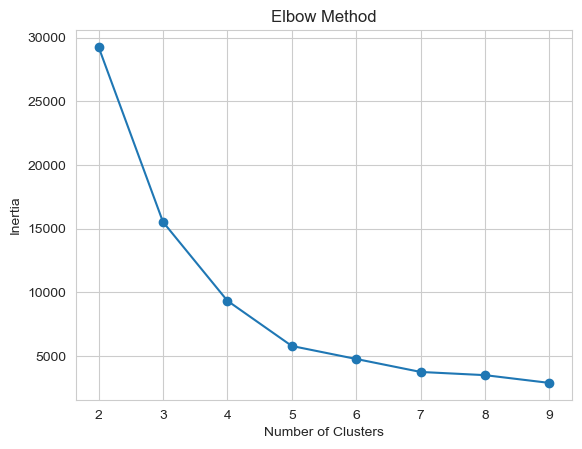

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Determine optimal clusters using the Elbow Method
inertia = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, clusters))

# Plot Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_data)


The optimal number of clusters k here is 4.

**Silhouette Score**

We calculate the silhouette score for different values of k. The silhouette score measures how similar an object is to its own cluster compared to other clusters. The range of the silhouette score is from -1 to 1. A higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

 A clustering with an average silhouette width of over 0.7 is considered to be "strong", a value over 0.5 "reasonable" and over 0.25 "weak" according to the wikipedia page on the silhouette score.

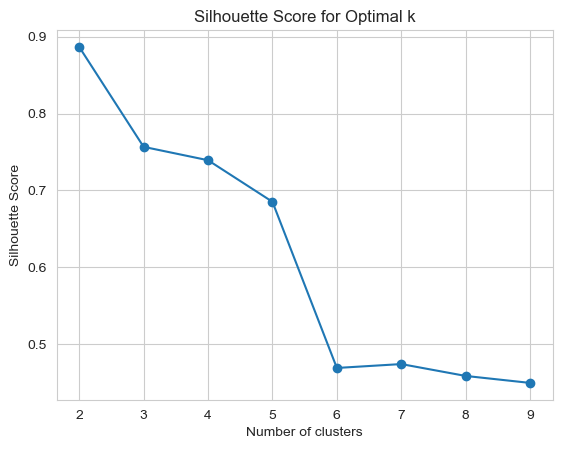

In [67]:
#Silhouette Score for different number of clusters
max_try = 10
def silhouette_score_kmeans(data):
    silhouette_scores = []
    for k in range(2, max_try):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    plt.plot(range(2, max_try), silhouette_scores, marker='o')
    plt.title("Silhouette Score for Optimal k")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

silhouette_score_kmeans(pca_data)

k = 4 produces a silhouette score greater than 0.7, so we let the optimal number of clusters k be 4.

In [68]:
optimal_k = 4

##### Performance Metrics for K-Means

We will use Silhouette Score as the primary metric for model evaluation. We will also calculate the Davies-Bouldin Index to evaluate the clustering performance. We can visualize the clusters using PCA components.

In [69]:
# Calculate Silhouette Score for the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_data)
sil_avg_kmeans = silhouette_score(pca_data, kmeans_clusters)
print(f"Silhouette Score for {optimal_k} Clusters: {sil_avg_kmeans:.4f}")

# Calculate Davies-Bouldin Score for the optimal number of clusters
davies_avg_kmeans = davies_bouldin_score(pca_data, kmeans_clusters)
print(f"Davies-Bouldin Score for {optimal_k} Clusters: {davies_avg_kmeans:.4f}")

Silhouette Score for 4 Clusters: 0.7393
Davies-Bouldin Score for 4 Clusters: 0.5070


The silhouette score is 0.74, which is considered a strong clustering. Davies-Bouldin Index is 0.5, which is a good score. The clusters are well-separated and compact.

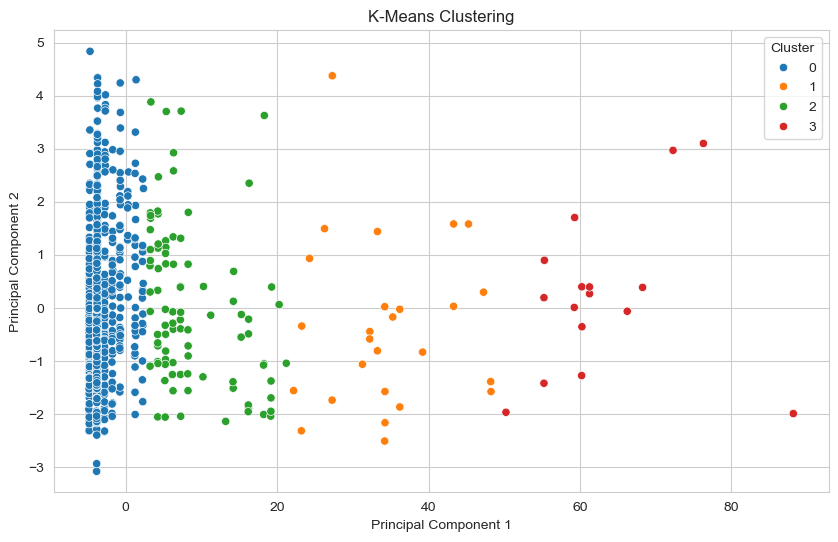

In [70]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_clusters, palette='tab10', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Since the PCA component 1 is the timeline effect, we can see that the clusters are well-separated based on the different song ages. The clusters are song age near 0, 2-20, 20-50, and 50+. 

#### Hierarchical Clustering

For comparison, we will use the same optimal number of clusters (k=4) for Hierarchical Clustering. 

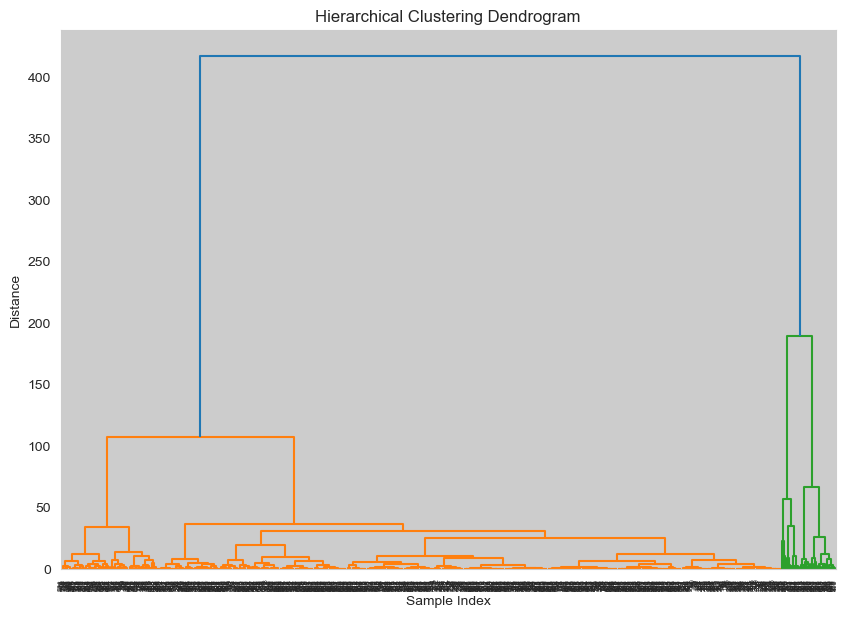

In [71]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# Perform hierarchical clustering
Z = linkage(pca_data, method='ward')  # 'ward' method is common for minimizing variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [72]:
# Choose the number of clusters to be the same as the one used for KMeans
num_clusters = optimal_k # 4 here
labels = fcluster(Z, num_clusters, criterion='maxclust')

In [73]:
# Calculate Silhouette Score
sil_avg_hie = silhouette_score(pca_data, labels)
print(f"Silhouette Score: {sil_avg_hie}")
# Calculate Davies-Bouldin Score
davies_avg_hie = davies_bouldin_score(pca_data, labels)
print(f"Davies-Bouldin Score: {davies_avg_hie}")

Silhouette Score: 0.6814117596192748
Davies-Bouldin Score: 0.5142115024004021


The Silhouette Score is 0.68, which is nearly strong. The Davies-Bouldin Index is 0.51 which is a good score. The clusters are well-separated and compact.

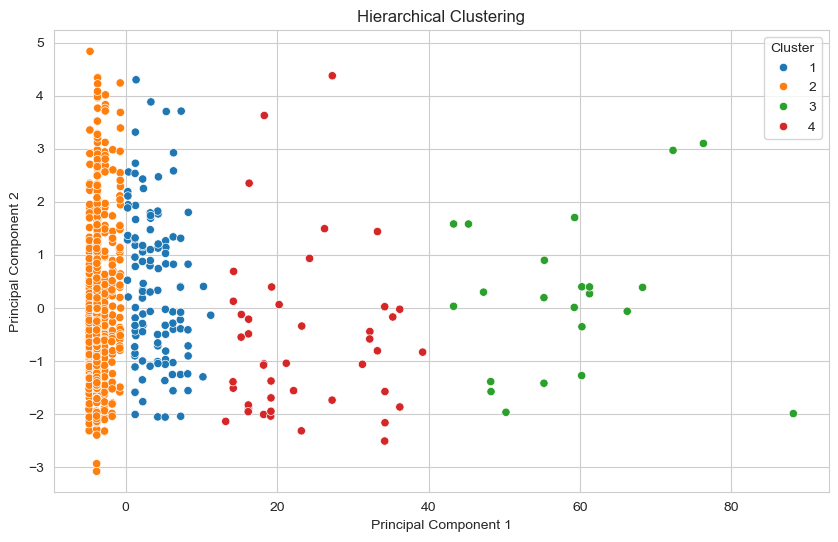

In [74]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='tab10', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Again, we can see that the clusters are well-separated based on the different song ages. The clusters are song age near 0, 1-10, 10-40, and 40+. 

#### Gaussian Mixtures Model (GMM)

Unlike K-Means and Hierarchical Clustering, GMM is a soft clustering method that assigns a probability of belonging to each cluster. We will use the same optimal number of clusters (k=4) for GMM.

In [75]:
from sklearn.mixture import GaussianMixture
# Perform Gaussian Mixture Model

# Fit GMM with optimal number of clusters k
n_components = optimal_k  # 4 here
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(pca_data)

# Get the cluster assignments
gmm_clusters = gmm.predict(pca_data)

# Evaluate performance
sil_gmm = silhouette_score(pca_data, gmm_clusters)
davies_gmm = davies_bouldin_score(pca_data, gmm_clusters)

print(f"Silhouette Score: {sil_gmm}")
print(f"Davies-Bouldin Index: {davies_gmm}")

Silhouette Score: 0.5665259924612105
Davies-Bouldin Index: 0.6790610204275571


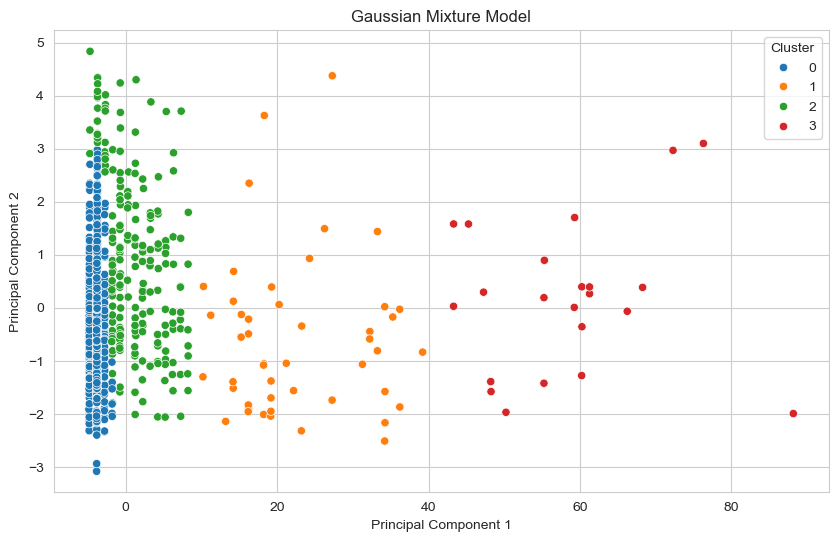

In [76]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_clusters, palette='tab10', legend='full')
plt.title('Gaussian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

The Silhouette Score is 0.57, which is reasonable. The Davies-Bouldin Index is 0.68, which is a good score. The clusters have some overlapping regions on blue and green clusters. The green cluster also include the newly-released acoustic, calm, and less energetic songs.

#### Comparison and Model Selection

We will compare the performance of different clustering methods based on Silhouette Score and Davies-Bouldin Index. We will interpret the clusters and identify common characteristics of songs within each cluster.

In [77]:
# create a table for the clustering results
clustering_results = pd.DataFrame()
clustering_results['Method'] = ['KMeans', 'Hierarchical', 'Gaussian Mixture']
clustering_results['Silhouette Score'] = [sil_avg_kmeans, sil_avg_hie, sil_gmm]
clustering_results['Davies-Bouldin Index'] = [davies_avg_kmeans, davies_avg_hie, davies_gmm]


#print the clustering results
print(clustering_results)

             Method  Silhouette Score  Davies-Bouldin Index
0            KMeans          0.739290              0.506987
1      Hierarchical          0.681412              0.514212
2  Gaussian Mixture          0.566526              0.679061


Overall, K-Means has the highest Silhouette Score and Davies-Bouldin Index, indicating well-separated and compact clusters. Hierarchical Clustering also produces strong clustering results. Both methods provide clear and distinct clusters based on song age and music features. GMM, while reasonable, has some overlapping regions and less distinct clusters. Therefore, we will select K-Means as the final clustering model for this dataset.

Next, we will analyze the clusters and identify common characteristics of songs within each cluster. Since some features are encoded and scaled, we will use the original features to interpret the clusters by use kmeans.labels_ to get the cluster labels and then group the data by cluster labels to get the statistics of each cluster.

In [78]:
# Perform clustering (KMeans) 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data) 

# Add the K-means labels as a new column in the original DataFrame
df_copy['Cluster_Label'] = kmeans_labels

# Display the first few rows to verify
print(df_copy.head())

   in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
0                   553                147  141381703                  43   
1                  1474                 48  133716286                  48   
2                  1397                113  140003974                  94   
3                  7858                100  800840817                 116   
4                  3133                 50  303236322                  84   

   in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
0              263                   45                10               826   
1              126                   58                14               382   
2              207                   91                14               949   
3              207                  125                12               548   
4              133                   87                15               425   

   bpm key   mode  danceability_%  valence_%  energy_%  acoust

In [79]:
# Define the aggregation functions
# use mode for categorical columns and mean for numerical columns
aggregation_functions = {
    'streams': 'mean',
    'bpm': lambda x: x.mode()[0],
    'danceability_%': 'mean',
    'valence_%': 'mean',
    'energy_%': 'mean',
    'acousticness_%': 'mean',
    'instrumentalness_%': 'mean',
    'liveness_%': 'mean',
    'speechiness_%': 'mean',
    'song_age': 'mean',
    'key': lambda x: x.mode()[0],    # Get the mode for categorical column 'key'
    'mode': lambda x: x.mode()[0]    # Get the mode for categorical column 'mode'
}

# Group by Cluster_Label and aggregate
cluster_summary = df_copy.groupby('Cluster_Label').agg(aggregation_functions).reset_index()

# Count the number of rows per cluster
cluster_counts = df_copy.groupby('Cluster_Label').size()

# Calculate the percentage for each cluster
cluster_percentages = (cluster_counts / len(df_copy)) * 100

# Add these to the summary
cluster_summary['num_rows'] = cluster_counts.values
cluster_summary['percentage'] = cluster_percentages.values

# Display the result
cluster_summary

,Cluster_Label,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,song_age,key,mode,num_rows,percentage
0,0,4.333228e+08,120,68.069512,51.341463,64.326829,26.957317,1.325610,18.318293,10.643902,1.474390,C#,Major,820,86.044071
1,1,9.071601e+08,80,58.153846,55.461538,64.576923,24.115385,3.807692,22.192308,4.307692,39.192308,G,Major,26,2.728227
2,2,1.137826e+09,95,61.604396,47.835165,66.868132,21.824176,3.483516,16.241758,8.186813,13.461538,F,Major,91,9.548793
3,3,4.378585e+08,140,55.437500,69.937500,46.625000,66.750000,0.250000,17.562500,4.375000,67.812500,D,Major,16,1.678909


We can plot the distribution of the features for each cluster to visualize the characteristics of songs within each cluster. 

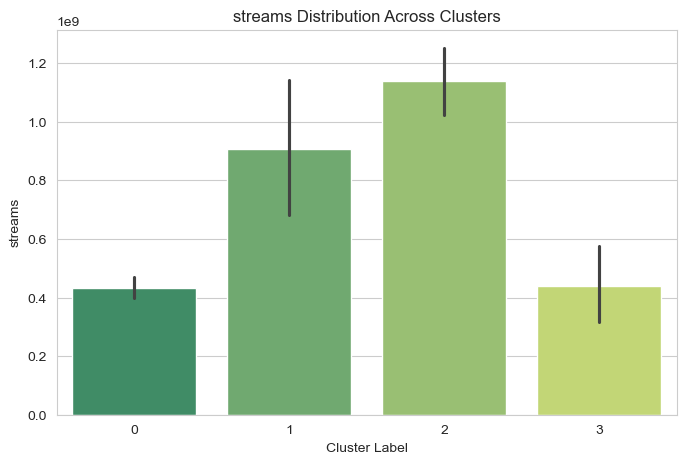

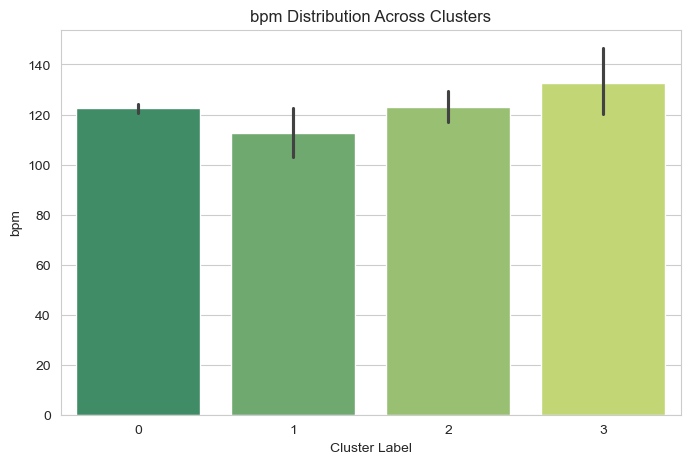

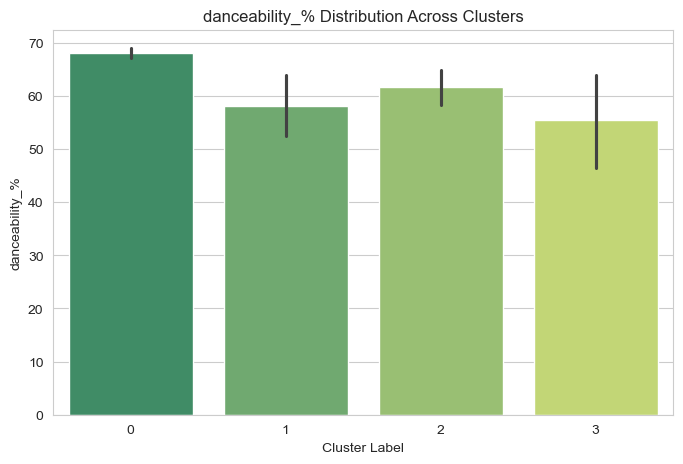

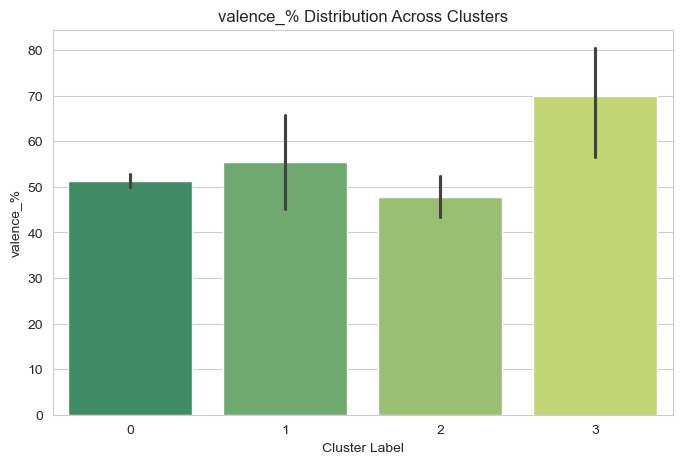

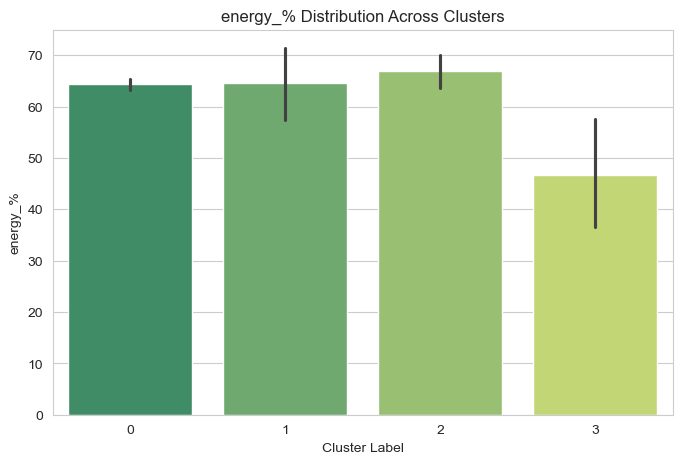

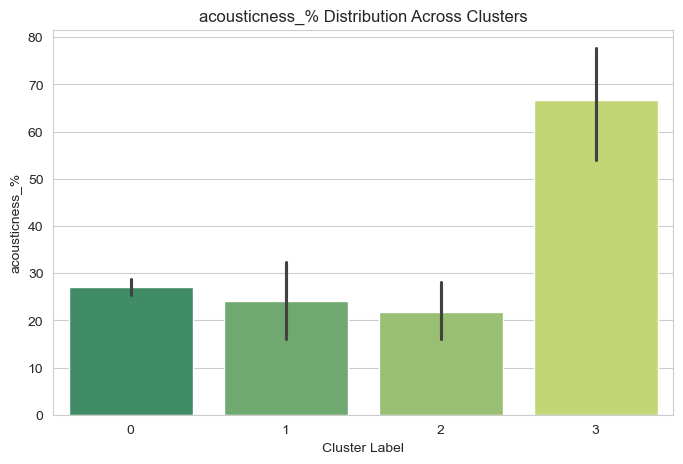

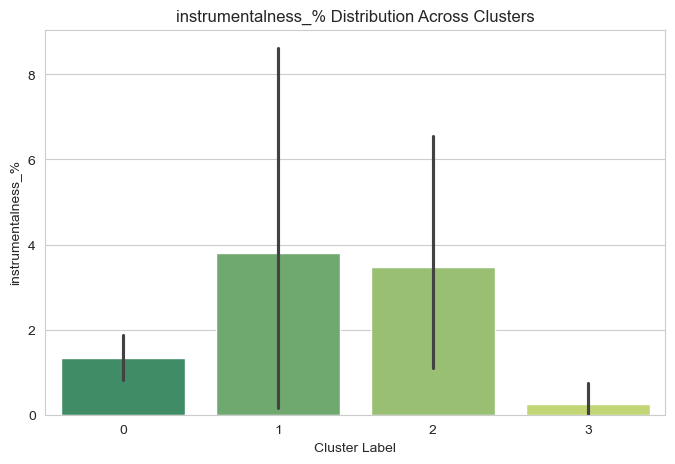

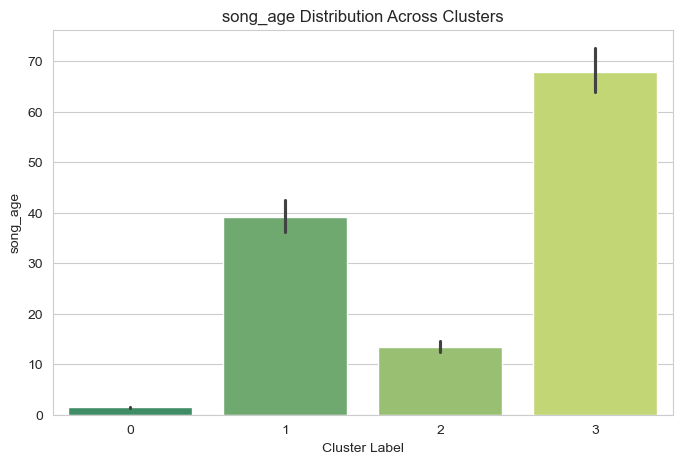

In [80]:
# Function to plot distributions of key features for clusters
def plot_cluster_distributions(data, features, cluster_col='Cluster_Label'):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=cluster_col, y=feature, data=data, palette='summer')
        plt.title(f'{feature} Distribution Across Clusters')
        plt.xlabel('Cluster Label')
        plt.ylabel(feature)
        plt.show()

# List of features to analyze
features_to_analyze = [
    'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'song_age'
]

# Generate bar plots for these features
plot_cluster_distributions(df_copy, features_to_analyze)


We can summarize the characteristics of each cluster as follows:

- Cluster 0: Represents modern, mainstream, and danceable songs.
- Cluster 1: Contains older, slower, and instrumental tracks.
- Cluster 2: Features energetic and highly popular songs with some moodiness.
- Cluster 3: Represents old, acoustic, and uplifting songs.